# Question and Answer Chat Bots

## Loading the Data

In [1]:
import pickle

In [2]:
import numpy as np
import pandas as pd

In [3]:
with open ('train_qa.txt','rb') as f:
    train_data=pickle.load(f)

In [4]:
with open ('test_qa.txt','rb') as f:
    test_data=pickle.load(f)

## Exploring the Format of the Data

In [5]:
type(train_data)

list

In [6]:
type(test_data)

list

In [7]:
len(train_data)

10000

In [8]:
len(test_data)

1000

In [9]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

##### There are 3 main components. The story, question and answer.

In [10]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [11]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [12]:
train_data[0][2]

'no'

## Setting up Vocabulary of All Words

In [13]:
all_data=train_data+test_data

In [14]:
len(all_data)

11000

In [15]:
vocab=set()

for story,question,answer in all_data:
    vocab=vocab.union(set(story))
    vocab=vocab.union(set(question))
    
vocab.add('no')
vocab.add('yes')
    

In [16]:
len(vocab)

37

In [17]:
vocab_len=len(vocab)+1

##### Longest Story and Question

In [18]:
max_story_len=max([len(data[0]) for data in all_data])

In [19]:
max_question_len=max([len(data[1]) for data in all_data])

## Vectorizing the Data

In [20]:
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer

In [21]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [22]:
tokenizer.word_index

{'moved': 1,
 'got': 2,
 'bedroom': 3,
 'garden': 4,
 'there': 5,
 'travelled': 6,
 'kitchen': 7,
 'took': 8,
 '.': 9,
 'hallway': 10,
 '?': 11,
 'back': 12,
 'milk': 13,
 'to': 14,
 'yes': 15,
 'football': 16,
 'bathroom': 17,
 'left': 18,
 'grabbed': 19,
 'mary': 20,
 'journeyed': 21,
 'went': 22,
 'dropped': 23,
 'no': 24,
 'the': 25,
 'apple': 26,
 'in': 27,
 'up': 28,
 'john': 29,
 'put': 30,
 'daniel': 31,
 'discarded': 32,
 'picked': 33,
 'is': 34,
 'down': 35,
 'sandra': 36,
 'office': 37}

In [23]:
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

##### converting each word to its matching word index using text_to_sequences

In [24]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [25]:
len(train_story_text)

10000

In [26]:
len(train_story_seq)

10000

### Functionalize Vectorization

In [27]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
    '''
    INPUT: 
    data: consisting of Stories,Queries,and Answers
    word_index: word index dictionary from tokenizer
    max_story_len: the length of the longest story (used for pad_sequences function)
    max_question_len: length of the longest question (used for pad_sequences function)


    OUTPUT:
    
    Vectorizes the stories,questions, and answers into padded sequences. We first loop for every story, query , and
    answer in the data. Then we convert the raw words to an word index value. Then we append each set to their appropriate
    output list. Then once we have converted the words to numbers, we pad the sequences so they are all of equal length.
    
    Returns this in the form of a tuple (X,Xq,Y) (padded based on max lengths)
    '''
    
    
    # X = STORIES
    X = []
    # Xq = QUERY/QUESTION
    Xq = []
    # Y = CORRECT ANSWER
    Y = []
    
    
    for story, query, answer in data:
        
        # Grab the word index
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        
        # Index 0 is reserved so we're going to use + 1
        y = np.zeros(len(word_index) + 1)
        
        # Now that y is all zeros and we know its just Yes/No , we can use numpy logic to create this assignment
        y[word_index[answer]] = 1
        
        # Append each set of story,query, and answer to their respective holding lists
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    # Finally, pad the sequences based on their max length so the RNN can be trained on uniformly long sequences.
        
    # RETURN TUPLE FOR UNPACKING
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [28]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [29]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [30]:
inputs_test

array([[ 0,  0,  0, ..., 25,  3,  9],
       [ 0,  0,  0, ..., 25,  4,  9],
       [ 0,  0,  0, ..., 25,  4,  9],
       ...,
       [ 0,  0,  0, ..., 25, 26,  9],
       [ 0,  0,  0, ..., 25,  4,  9],
       [ 0,  0,  0, ..., 26,  5,  9]])

In [31]:
queries_test

array([[34, 29, 27, 25,  7, 11],
       [34, 29, 27, 25,  7, 11],
       [34, 29, 27, 25,  4, 11],
       ...,
       [34, 20, 27, 25,  3, 11],
       [34, 36, 27, 25,  4, 11],
       [34, 20, 27, 25,  4, 11]])

In [32]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0., 503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [34]:
tokenizer.word_index['yes']

15

In [35]:
tokenizer.word_index['no']

24

## Creating the Model

In [36]:
from keras.models import Sequential, Model
from keras.layers import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

In [37]:
# PLACEHOLDER shape=(max_story_len,batch_size)
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [38]:
vocab_size=len(vocab)+1

## Encoders

##### Input Encoder M

In [39]:
# Input gets embedded to a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

# output:
# (samples, story_maxlen, embedding_dim)

##### Input Encoder C

In [40]:
# Input gets embedded to a sequence of vectors
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

# output:
# (samples, story_maxlen,max_question_len )

##### Question Encoder

In [41]:
# embedded the question into a sequence of vectors
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))
# output: (samples, query_maxlen, embedding_dim)

##### Encode the Sequences

In [42]:
# encode input sequence and questions (which are indices)
# to sequences of dense vectors
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

##### Use dot product to compute the match between first input vector seq and the query

In [43]:
# shape: `(samples, story_maxlen, query_maxlen)`
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

##### Add this match matrix with the second input vector sequence

In [44]:
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

##### Concatenate

In [45]:
# concatenate the match matrix with the question vector sequence
answer = concatenate([response, question_encoded])

In [46]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [47]:
# Reduce with RNN (LSTM)
answer = LSTM(32)(answer)  # (samples, 32)

In [48]:
# Regularization with Dropout
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)

In [49]:
# we output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

## Fit/Train the Network

In [52]:
history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=100,validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6947 - accuracy: 0.5052 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 2/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6960 - accuracy: 0.4893 - val_loss: 0.6945 - val_accuracy: 0.5030
Epoch 3/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6949 - accuracy: 0.5042 - val_loss: 0.6946 - val_accuracy: 0.4970
Epoch 4/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6954 - accuracy: 0.4998 - val_loss: 0.6934 - val_accuracy: 0.4970
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6952 - accuracy: 0.4982 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6953 - accuracy: 0.4933 - val_loss: 0.6948 - val_accuracy: 0.4970
Epoch 7/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6951 - accuracy: 0.4944 - val_loss: 0.6932 - val_accuracy: 0.5

Epoch 58/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6725 - accuracy: 0.5708 - val_loss: 0.6659 - val_accuracy: 0.5690
Epoch 59/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6602 - accuracy: 0.5991 - val_loss: 0.6444 - val_accuracy: 0.6410
Epoch 60/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6489 - accuracy: 0.6171 - val_loss: 0.6335 - val_accuracy: 0.6490
Epoch 61/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6378 - accuracy: 0.6327 - val_loss: 0.6219 - val_accuracy: 0.6550
Epoch 62/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6334 - accuracy: 0.6384 - val_loss: 0.6206 - val_accuracy: 0.6520
Epoch 63/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6257 - accuracy: 0.6482 - val_loss: 0.6132 - val_accuracy: 0.6500
Epoch 64/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6203 - accuracy: 0.6625 - val_loss: 0.6061 - val_accuracy:

## Evaluating the Model

##### Plotting Out Training History

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


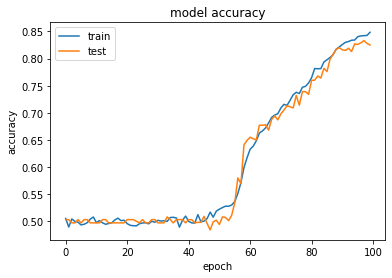

In [54]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Evaluating on Given Test Set

In [55]:
pred_results = model.predict(([inputs_test, queries_test]))

32/32 [==============================] - 0s 3ms/step


In [56]:
pred_results

array([[6.1248606e-08, 6.5479703e-08, 6.6528756e-08, ..., 8.1460819e-08,
        6.1474609e-08, 6.0394804e-08],
       [2.9728051e-08, 3.8549551e-08, 3.6114759e-08, ..., 4.1744535e-08,
        2.8803962e-08, 3.2001950e-08],
       [2.6850786e-08, 2.1157948e-08, 2.4377977e-08, ..., 2.6307701e-08,
        2.5398160e-08, 2.1961334e-08],
       ...,
       [1.4897698e-08, 1.5767162e-08, 1.5824043e-08, ..., 1.1262157e-08,
        9.0180903e-09, 1.4352247e-08],
       [1.9136272e-07, 1.1083487e-07, 1.5702130e-07, ..., 1.8384665e-07,
        1.8101504e-07, 1.2825683e-07],
       [1.5642168e-07, 1.1091714e-07, 1.6945086e-07, ..., 1.6979736e-07,
        1.7260935e-07, 1.3600160e-07]], dtype=float32)

In [57]:
pred_results.shape

(1000, 38)

In [80]:
test_data[2][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.',
 'Mary',
 'discarded',
 'the',
 'milk',
 '.',
 'John',
 'went',
 'to',
 'the',
 'garden',
 '.',
 'Daniel',
 'moved',
 'to',
 'the',
 'bedroom',
 '.',
 'Daniel',
 'went',
 'to',
 'the',
 'garden',
 '.']

In [81]:
story =' '.join(word for word in test_data[2][0])
print(story)

Mary got the milk there . John moved to the bedroom . Mary discarded the milk . John went to the garden . Daniel moved to the bedroom . Daniel went to the garden .


In [82]:
query = ' '.join(word for word in test_data[2][1])
print(query)

Is John in the garden ?


In [83]:
print("True Test Answer from Data is:",test_data[2][2])

True Test Answer from Data is: yes


In [62]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.9452177


In [89]:
 data=pd.DataFrame(data=[l,a])

In [86]:
l=[]
for i in test_data:
    p=i[2]
    l.append(p)

In [76]:
a=[]
for i in pred_results:
    val_max = np.argmax(i)
    for key, val in tokenizer.word_index.items():
        if val == val_max:
            k = key
            a.append(k)
        

In [92]:
data=data.transpose()

In [103]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [95]:
print(classification_report(l,a))

              precision    recall  f1-score   support

          no       0.87      0.77      0.82       503
         yes       0.79      0.88      0.83       497

    accuracy                           0.82      1000
   macro avg       0.83      0.83      0.82      1000
weighted avg       0.83      0.82      0.82      1000



In [96]:
print(confusion_matrix(l,a))

[[388 115]
 [ 60 437]]


In [104]:
print(accuracy_score(l,a))

0.825


### Our model has an accuracy of 82.5%